<a href="https://colab.research.google.com/github/DARSHININANTHAGOPAL/NOTESHARING_WEBAPP_NM_FULLSTACK_PYTHON_DJANGO_PROJECT/blob/main/CreditCardDetection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Wrangling
import pandas as pd
import numpy as np

#Statistics / Logistic Regression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from scipy import stats

#Cross Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Confusion Matrix
from sklearn.metrics import confusion_matrix

#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Trees
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#Scores
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Model turning
from sklearn.model_selection import GridSearchCV

RANDOM_STATE=42
%matplotlib inline

In [ ]:
credit_original_data = pd.read_csv("creditcard_2023.csv")
credit_original_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
cc_data = credit_original_data.copy()
cc_data.info()
cc_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-1.109271e-14,-3.429498e-14,-1.209242e-14,3.825991e-15,6.288281e-15,-2.751174e-14,1.240002e-14,8.208047e-15,-1.002980e-14,...,2.210679e-15,-8.767441e-16,4.376179e-16,6.825608e-16,2.545689e-15,1.781906e-15,2.817586e-15,2.891419e-15,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [ ]:
#perform logistic regression using glm (generalized linear model) method
logit_equation = 'Class~V1+V2+V3+V4+V5+V6+V7+V8+V9+V10+V11+V12+V13+V14+V15+V16+V17+V18+V19+V20+V21+V22+V23+V24+V25+V26+V27+V28+Amount'
fit1 = smf.glm(logit_equation, data=cc_data, family=sm.families.Binomial()).fit()
print(fit1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:               568630
Model:                            GLM   Df Residuals:                   568600
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53585.
Date:                Sat, 04 Nov 2023   Deviance:                   1.0717e+05
Time:                        18:38:15   Pearson chi2:                 7.82e+16
No. Iterations:                    13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.0810      0.084    108.499      0.0

In [ ]:
# Columns to keep
target_columns = ['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'Amount', 'Class']

# Create a new DataFrame with the selected columns
cc_data = cc_data[target_columns]
cc_data.head()

,id,V1,V2,V3,V4,V5,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,14278.97,0


In [2]:
# Define the columns you want to plot
columns_to_plot = ['V1', 'V2', 'V3', 'V4', 'V5', 'Amount']

# Create subplots for the histograms
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columns_to_plot):
    row_idx = i // 3
    col_idx = i % 3

    sns.histplot(data=cc_data, x=col, kde=True, color='blue', ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Histogram of {col}')
    axes[row_idx, col_idx].set_xlabel(col)
    axes[row_idx, col_idx].set_ylabel('Frequency')

# Remove empty subplots, if any
for i in range(len(columns_to_plot), 2 * 3):
    fig.delaxes(axes.flatten()[i])

plt.show()

NameError: name 'plt' is not defined

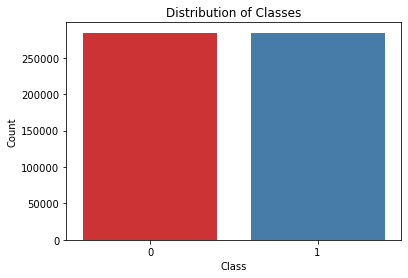

Count of Fraudulent Transactions: 284315
Count of Non-Fraudulent Transactions: 284315


In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=cc_data, palette='Set1')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

fraud_count = (cc_data['Class']==1).sum()
nonfraud_count = (cc_data['Class']==0).sum()
print("Count of Fraudulent Transactions:", fraud_count)
print("Count of Non-Fraudulent Transactions:", nonfraud_count)

In [ ]:
#perform logistic regression using glm (generalized linear model) method.
#Note, we leave out Amount as it isn't statistically significant
logit_eq = 'Class~V1+V2+V3+V4+V5'
fit1 = smf.glm(logit_eq, data=cc_data, family=sm.families.Binomial()).fit()
print(fit1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:               568630
Model:                            GLM   Df Residuals:                   568624
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0149e+05
Date:                Sat, 04 Nov 2023   Deviance:                   2.0298e+05
Time:                        18:38:31   Pearson chi2:                 3.39e+08
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3717      0.009    158.461      0.0

In [ ]:
#split data into training and validation/test set
train, test = train_test_split(cc_data, test_size=0.2, random_state = 42)

#Fit logistic regression model with training set
fit2 = smf.glm(logit_eq, data=train, family=sm.families.Binomial()).fit()

In [ ]:
#Make predictions on the validation set with the new model
predictions = fit2.predict(test)

#Convert predicted probabilities to binary predictions: 1 if prob>0.5
encode = lambda x: 1 if x>=0.5 else 0
predicted = predictions.map(encode)

# compare the predicted values with the actual values in the test set
misclassified = (predicted != test['Class']).sum()

mis_rate = misclassified/len(test)
print("Our model has a misclassifcation rate of:", mis_rate*100, "%")

Our model has a misclassifcation rate of: 6.686245889242566 %


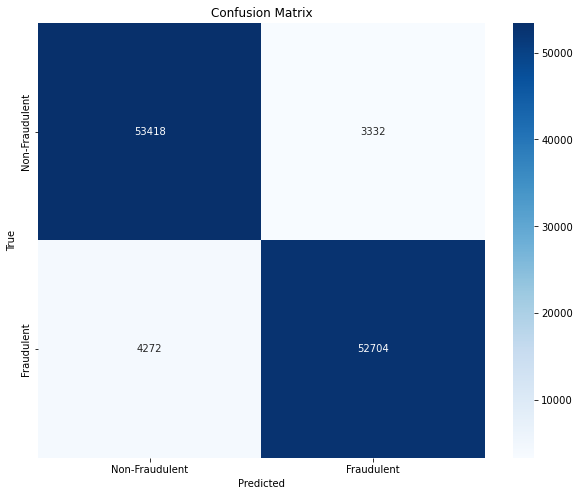

In [ ]:
true_labels = test['Class']
cm = confusion_matrix(true_labels, predicted)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
test_sizes = [0.1, 0.3, 0.5]
#to store the misclassification accuracy score for each model
model_rates = []
#to store the model parameters
model_params = []

#iterate through each test size
for test_size in test_sizes:

    #split data into training and validation sets
    train, test = train_test_split(cc_data, test_size=test_size, random_state = 42)

    #fit the logistic regression model on training set
    model = smf.glm(logit_eq, data=train, family=sm.families.Binomial()).fit()

    #Store model parameters
    model_params.append(model.params)

    #Get predictions on test/validation test
    predicted_probs = model.predict(test)

    #Classifdy predictions on 0.5 threshold
    predicted = predicted_probs.map(encode)

    #Calculate misclassification rate & store rates
    misclassified = (predicted != test['Class']).sum()
    mis_rate = misclassified / len(test)
    model_rates.append(mis_rate)

#Store misclassification rates in designated variables
mis_rate_10, mis_rate_30, mis_rate_50 = model_rates

In [ ]:
print(f"Misclassification Rate for 10% Test Size:", mis_rate_10*100, "%")
print(f"Misclassification Rate for 30% Test Size:", mis_rate_30*100, "%")
print(f"Misclassification Rate for 50% Test Size:", mis_rate_50*100, "%")

Misclassification Rate for 10% Test Size: 6.853314105833319 %
Misclassification Rate for 30% Test Size: 6.631728892249793 %
Misclassification Rate for 50% Test Size: 6.641225401403374 %


In [ ]:
#Store all miclassification rates
misclass_rates = []

model = LogisticRegression() #Define ML Model

for trial in range(10):
    #Define cross-value method
    cv_method = KFold(n_splits = 10, shuffle=True, random_state = trial)

    #perform cv and get accuracy scores for each fold
    scores = cross_val_score(model, cc_data[['V1','V2','V3','V4','V5']], cc_data['Class'], cv=cv_method, scoring ='accuracy')

    #calculate misclassification rate for each fold
    misclass_rate = 1 - scores
    misclass_rates.extend(misclass_rate)

mis_rate_kfold =sum(misclass_rates) / len(misclass_rates)
print(mis_rate_kfold)

0.06621212387668608


In [ ]:
#Get get original dataset
cc_data = credit_original_data.copy()
cc_data = cc_data.drop(columns = ['id', 'Amount'])

cc_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0


In [ ]:
# Calculate pairwise correlations
corr_matrix = cc_data.corr()
# Find the correlation of 'HD' with all predictor variables
corr_HD = corr_matrix['Class']

# Find the predictor with the highest positive correlation
highest_corr = corr_HD.drop('Class').idxmax()

print(f"The feature that has the highest correlation with Credit Card Fraud is: {highest_corr}")

The feature that has the highest correlation with Credit Card Fraud is: V4


In [ ]:
X = cc_data.drop('Class', axis=1) # All predictor variables
y = cc_data['Class'] # Target Output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create Bagging Classifier
bag = BaggingClassifier(random_state=42)

# Train Bagging Classifier
bag.fit(X_train, y_train)

BaggingClassifier(random_state=42)

In [ ]:
# Make Predictions using BagClassifier on test data
y_pred = bag.predict(X_test)

# Calculate Precision, Recall, and Accuracy Scores
bag_precision = precision_score(y_test, y_pred)
bag_recall = recall_score(y_test, y_pred)
bag_accuracy = accuracy_score(y_test, y_pred)

print(f"Bagging Classifier - Precision: {bag_precision}")
print(f"Bagging Classifier - Recall: {bag_recall}")
print(f"Bagging Classifier - Accuracy: {bag_accuracy}")

Bagging Classifier - Precision: 0.9991053730243654
Bagging Classifier - Recall: 0.9996489750070205
Bagging Classifier - Accuracy: 0.9993756924537924


In [ ]:
bag_misclass_rate = (1 - bag_accuracy)*100
print(f"Bagging misclassification rate: {bag_misclass_rate:.2f}%")

Bagging misclassification rate: 0.06%


In [ ]:
"""
# Define the hyperparameter grid to search through (range 5 to 29)
params = {'n_estimators': range(5, 30)}

# Create GridSearchCV with 10-Fold CV
grid_search = GridSearchCV(bag, params, cv=10, scoring='accuracy')

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Get best estimator with tuned paramters
best_bag = grid_search.best_estimator_

# Make predictions on training data
y_pred = best_bag.predict(X_test)

bag_tuned_precision = precision_score(y_test, y_pred)
bag_tuned_recall = recall_score(y_test, y_pred)
bag_tuned_accuracy = accuracy_score(y_test, y_pred)

# Store best performing # of estimators
#number = best_bag.n_estimators
bag_best_param = {'n_estimators': best_bag.n_estimators}

print(f"Tuned Bagging Classifier - Precision: {bag_tuned_precision}")
print(f"Tuned Bagging Classifier - Recall: {bag_tuned_recall}")
print(f"Tuned Bagging Classifier - Accuracy: {bag_tuned_accuracy}")
print(bag_best_param)
"""

'\n# Define the hyperparameter grid to search through (range 5 to 29)\nparams = {\'n_estimators\': range(5, 30)}\n\n# Create GridSearchCV with 10-Fold CV\ngrid_search = GridSearchCV(bag, params, cv=10, scoring=\'accuracy\')\n\n# Fit GridSearchCV to training data\ngrid_search.fit(X_train, y_train)\n\n# Get best estimator with tuned paramters\nbest_bag = grid_search.best_estimator_\n\n# Make predictions on training data\ny_pred = best_bag.predict(X_test)\n\nbag_tuned_precision = precision_score(y_test, y_pred)\nbag_tuned_recall = recall_score(y_test, y_pred)\nbag_tuned_accuracy = accuracy_score(y_test, y_pred)\n\n# Store best performing # of estimators\n#number = best_bag.n_estimators\nbag_best_param = {\'n_estimators\': best_bag.n_estimators}\n\nprint(f"Tuned Bagging Classifier - Precision: {bag_tuned_precision}")\nprint(f"Tuned Bagging Classifier - Recall: {bag_tuned_recall}")\nprint(f"Tuned Bagging Classifier - Accuracy: {bag_tuned_accuracy}")\nprint(bag_best_param)\n'

In [ ]:
# Create Random Forest Classifier
rf = RandomForestClassifier()

#Train rf classifier
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Predict test outcomes using random forest classifier
y_pred_rf = rf.predict(X_test)

rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"RandomForest Classifier - Precision: {rf_precision}")
print(f"RandomForest Classifier - Recall: {rf_recall}")
print(f"RandomForest Classifier - Accuracy: {rf_accuracy}")

RandomForest Classifier - Precision: 0.9997543428671697
RandomForest Classifier - Recall: 1.0
RandomForest Classifier - Accuracy: 0.9998768971035648


In [ ]:
rf_misclass_rate = (1 - rf_accuracy)*100
print(f"Random Forest misclassification rate: {rf_misclass_rate:.2f}%")

Random Forest misclassification rate: 0.01%


In [ ]:
# Access the feature importances
feature_importances = rf.feature_importances_

# Get the feature names from your dataset
feature_names = X_train.columns

# Print all features and their importances
for feature_name, importance in zip(feature_names, feature_importances):
    print(f"Feature {feature_name}: Importance = {importance:.4f}")

Feature V1: Importance = 0.0120
Feature V2: Importance = 0.0326
Feature V3: Importance = 0.0612
Feature V4: Importance = 0.1463
Feature V5: Importance = 0.0070
Feature V6: Importance = 0.0068
Feature V7: Importance = 0.0173
Feature V8: Importance = 0.0108
Feature V9: Importance = 0.0186
Feature V10: Importance = 0.1262
Feature V11: Importance = 0.0955
Feature V12: Importance = 0.0714
Feature V13: Importance = 0.0064
Feature V14: Importance = 0.1842
Feature V15: Importance = 0.0058
Feature V16: Importance = 0.0538
Feature V17: Importance = 0.0741
Feature V18: Importance = 0.0068
Feature V19: Importance = 0.0075
Feature V20: Importance = 0.0057
Feature V21: Importance = 0.0152
Feature V22: Importance = 0.0041
Feature V23: Importance = 0.0056
Feature V24: Importance = 0.0043
Feature V25: Importance = 0.0056
Feature V26: Importance = 0.0057
Feature V27: Importance = 0.0043
Feature V28: Importance = 0.0055


In [1]:
"""
# Define our hyperparamters
params = {'max_depth':range(3,20), # Range of tree depth
          'n_estimators':range(10,29) # Range of # of trees
         }

# Create GridSearchCV for RandomForest Classifier with 10fold CV
grid_search_rf = GridSearchCV(rf, params, cv=10, scoring='accuracy')

# Fit GridSearch with training data
grid_search_rf.fit(X_train, y_train)

# Get best estimators with tuned hyperparamters
best_rf = grid_search_rf.best_estimator_

# Make predictions using tuned rf classifier
y_pred = best_rf.predict(X_test)

rf_tuned_precision = precision_score(y_test, y_pred)
rf_tuned_recall = recall_score(y_test, y_pred)
rf_tuned_accuracy = accuracy_score(y_test, y_pred)

rf_tuned = {'max_depth': best_rf.max_depth, 'n_estimators': best_rf.n_estimators}

print(f"Tuned Random Forest - Accuracy: {rf_tuned_accuracy}")
print(f"Tuned Random Forest - Recall: {rf_tuned_recall}")
print(f"Tuned Random Forest - Precision: {rf_tuned_precision}")
"""

'\n# Define our hyperparamters\nparams = {\'max_depth\':range(3,20), # Range of tree depth\n          \'n_estimators\':range(10,29) # Range of # of trees\n         }\n\n# Create GridSearchCV for RandomForest Classifier with 10fold CV\ngrid_search_rf = GridSearchCV(rf, params, cv=10, scoring=\'accuracy\')\n\n# Fit GridSearch with training data\ngrid_search_rf.fit(X_train, y_train)\n\n# Get best estimators with tuned hyperparamters \nbest_rf = grid_search_rf.best_estimator_\n\n# Make predictions using tuned rf classifier\ny_pred = best_rf.predict(X_test)\n\nrf_tuned_precision = precision_score(y_test, y_pred)\nrf_tuned_recall = recall_score(y_test, y_pred)\nrf_tuned_accuracy = accuracy_score(y_test, y_pred)\n\nrf_tuned = {\'max_depth\': best_rf.max_depth, \'n_estimators\': best_rf.n_estimators}\n\nprint(f"Tuned Random Forest - Accuracy: {rf_tuned_accuracy}")\nprint(f"Tuned Random Forest - Recall: {rf_tuned_recall}")\nprint(f"Tuned Random Forest - Precision: {rf_tuned_precision}")\n'